### Model to predict the covide cases in near future in US based on the dataprovided. 

#### Group Members

* Pushpak Jalan - CSB17002
* Arup Kar - CSB17031
* Bishal Deb - CSB17076

In [1]:
import pandas as pd
import seaborn as sns

# We read the data from the file
data = pd.read_csv('data/data.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


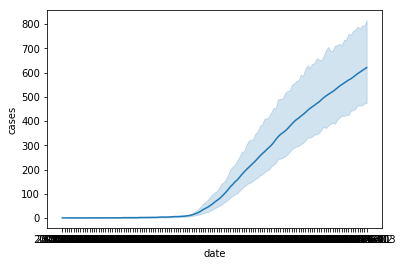

In [2]:
# We plot the graph between date 

sns.lineplot(x="date", y="cases", data=data)

In [3]:
# We select the data from required columns for the computations

feature_data = data[['date', 'cases']]
index = feature_data.index

# We group the columns according to the data
feature_data  = feature_data.groupby('date').sum()
feature_data['date'] = feature_data.index
rows = feature_data.shape[0]
feature_data.index = index[:rows]
feature_data.head()

,cases,date
0,1,2020-01-21
1,1,2020-01-22
2,1,2020-01-23
3,2,2020-01-24
4,3,2020-01-25


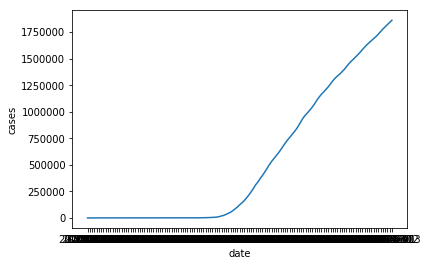

In [4]:
sns.lineplot(x="date", y="cases", data=feature_data)

In [5]:
from datetime import datetime

# Function to Get the no of days from 1st Jan 2020 to the date in the arguments and return the no. of days passed
def days_between(x):
    d1 = datetime.strptime('2020-01-01', "%Y-%m-%d")
    d2 = datetime.strptime(x, "%Y-%m-%d")
    return (d2 - d1).days

In [6]:
# We change the form of date to days using the function mentioned above for computation
feature_data['date'] = feature_data['date'].apply(days_between)

feature_data = feature_data.sample(frac=1).reset_index(drop=True)

feature_data.head()

,cases,date
0,1515054,138
1,7,30
2,43504,82
3,337619,95
4,732215,108


In [7]:
# We divide the dataset into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data[['date']], 
                                                    feature_data['cases'], 
                                                    random_state=1)

In [8]:
# We train the models using polynomial regression of degree 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_pred =  model.predict(x_test_poly)

In [9]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(solver = 'newton-cg', max_iter = 500 )
# model.fit(X_train, y_train)
# y_pred =  model.predict(X_test)

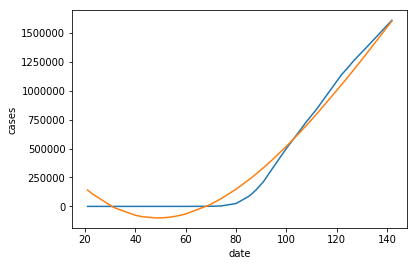

In [10]:
# Predicted and actual values are compared
X_test['cases'] = y_test
sns.lineplot(x='date', y="cases", data=X_test)
X_test['cases'] = y_pred
sns.lineplot(x='date', y="cases", data=X_test)

In [11]:
# Since the dataset is small, we train again with the total data for prediction
x_poly = poly.fit_transform(feature_data[['date']])
model.fit(x_poly, feature_data['cases'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Function to predict future values

import numpy as np
from datetime import date, timedelta

def predictCases():
    i = True
    # Returns the current local date 
    today = date.today()
    print("Today date is: ", today)
    while(i):
        try:
            count = int(input("\nEnter the number of days to predict starting from tomorrow: "))

            val = days_between(str(today))
            testVal =  np.array([[i] for i in range(val+1, val + count)])
            
            x_poly = poly.fit_transform(testVal)
            y_pred =  model.predict(x_poly)

            print("\nTotal cases are for the next ",count," day(s) are : ")
            for i in range(1, count):
                print("\t",today + timedelta(days=i)," : ",int(y_pred[i-1]))
            i = False
        except ValueError:
            print("Please try again!")

In [13]:
predictCases()
print("\nExiting... Thank You!")

Today date is:  2020-06-27

Enter the number of days to predict starting from tomorrow: 20

Total cases are for the next  20  day(s) are : 
	 2020-06-28  :  2702377
	 2020-06-29  :  2731045
	 2020-06-30  :  2759602
	 2020-07-01  :  2788043
	 2020-07-02  :  2816363
	 2020-07-03  :  2844557
	 2020-07-04  :  2872621
	 2020-07-05  :  2900549
	 2020-07-06  :  2928337
	 2020-07-07  :  2955978
	 2020-07-08  :  2983469
	 2020-07-09  :  3010804
	 2020-07-10  :  3037979
	 2020-07-11  :  3064987
	 2020-07-12  :  3091825
	 2020-07-13  :  3118487
	 2020-07-14  :  3144969
	 2020-07-15  :  3171264
	 2020-07-16  :  3197369

Exiting... Thank You!
